# <font color='brown'>Face Mask Detection Model - MobilenetV2</font>

### Importing the Necessary Packages

In [5]:
from imutils import paths #To import path of the images in dataset
import matplotlib.pyplot as plt # To use plots for visualisation
import numpy as np # Array handling library
import os # For file handling

from tensorflow.keras.preprocessing.image import ImageDataGenerator # For Data Augmentation
from tensorflow.keras.applications import MobileNetV2 # Deep Neural network model trained on Imagenet Dataset of Google

from tensorflow.keras.layers import AveragePooling2D # To Construct Pooling Layer
from tensorflow.keras.layers import Dropout # To Dropout the inputs for tackling overfitting 
from tensorflow.keras.layers import Flatten # Flatten the multidimension to single dimension
from tensorflow.keras.layers import Dense # Output layer - Fully connected
from tensorflow.keras.layers import Input # To create an Input layer without using Input Layer
from tensorflow.keras.models import Model # To group layers into an object 

from tensorflow.keras.optimizers import Adam # Optimizer for Training the Model

# Image Pre-Processing for Training the model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

# One-Hot encoding of the labels
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split # To Split the Dataset into Train & Test
from sklearn.metrics import classification_report # To Print a Classification Report
from sklearn.metrics import confusion_matrix # To Print a Confusion matrix
import seaborn as sns # To plot a Confusion Matrix

### Creating an Object for Images and Label

In [6]:
image_paths = list(paths.list_images('/Users/vinith/Desktop/Dissertation/dataset')) # Getting the image paths
data = [] # list object to store images
labels = [] # list object to store labels  

### Looping over the image dataset to append them on respective lists

In [7]:
for image_path in image_paths: # looping over the image_paths 
    lab = image_path.split(os.path.sep)[-2] # extracting the class label from the filename
    
    # load the input_image with target resolution (224x224) and preprocess it
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)

    # update the data and labels lists, respectively
    data.append(img)
    labels.append(lab)

/Users/vinith/tensorflow-test/env/lib/python3.8/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


### Convert the data and labels to NumPy arrays

In [8]:
data = np.array(data, dtype="float32") # converting imagedata into array  
labels = np.array(labels) # converting label data into array 

In [9]:
data.shape

(4092, 224, 224, 3)

In [10]:
labels.shape

(4092,)

### One-Hot Encoding of Categorical Variable

In [11]:
# One-Hot encoding using LabelBinarizer() technique
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

### Train & Test Split

In [12]:
# Splitting the training and testing data in the ratio of 80/20.
(X_train, X_test, y_train, y_test) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=45)

In [13]:
X_train.shape

(3273, 224, 224, 3)

In [14]:
X_test.shape

(819, 224, 224, 3)

### Data Augmentation

In [15]:
# constructing the training image_generator for image transformation
augment = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,
                         shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

### Loading a Pre_trained Model MobilenetV2

In [16]:
# loading the MobileNetV2 pretrained model with weights of imagent dataset
# Also remove the last fully connected layer
bm = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
bm.summary()

Metal device set to: Apple M1


2022-12-11 11:56:30.207359: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-11 11:56:30.207917: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [17]:
# constructing the Output fully connected layer with output of 2 category
hm = bm.output
hm = AveragePooling2D(pool_size=(7, 7))(hm) # a layer with average pooling size of (7,7)
hm = Flatten(name="flatten")(hm) # Flatten the layer into single dimension
hm = Dense(128, activation="relu")(hm) # Output layer of 128
hm = Dropout(0.5)(hm) # Dropout 50% of the neurons
hm = Dense(2, activation="softmax")(hm) # Fianl Output Layer with 2 Categories

In [18]:
# Now place the created layers of output on the base model 
# to construct a model that produces output with 2 categories
main_model = Model(inputs=bm.input, outputs=hm)
main_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [19]:
# Freezing all the layers in the base model bm
for layer in bm.layers:
    layer.trainable = False

### Initialising the learning rate, Number of Epoch for training & Batch Size

In [20]:
lrate = 1e-4 # 0.0001 while calculating gradients 
epoch = 10 # No. of Epoch
bs = 32

### Model Compilation

In [21]:
opt = Adam(lr=lrate, decay=lrate / epoch)
main_model.compile(loss="binary_crossentropy", optimizer=opt,
metrics=["accuracy"])

/Users/vinith/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Model Training

In [22]:
History = main_model.fit(augment.flow(X_train, y_train, batch_size=bs),
steps_per_epoch=len(X_train) // bs,
validation_data=(X_test, y_test),
validation_steps=len(X_test) // bs,
epochs=epoch)

Epoch 1/10


2022-12-11 11:56:31.598196: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-11 11:56:32.692325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


102/102 [==============================] - ETA: 0s - loss: 0.3328 - accuracy: 0.8929

2022-12-11 11:56:56.153752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


102/102 [==============================] - 29s 262ms/step - loss: 0.3328 - accuracy: 0.8929 - val_loss: 0.1417 - val_accuracy: 0.9646
Epoch 2/10
102/102 [==============================] - 23s 219ms/step - loss: 0.1259 - accuracy: 0.9695 - val_loss: 0.0861 - val_accuracy: 0.9707
Epoch 3/10
102/102 [==============================] - 22s 211ms/step - loss: 0.0821 - accuracy: 0.9806 - val_loss: 0.0721 - val_accuracy: 0.9756
Epoch 4/10
102/102 [==============================] - 22s 211ms/step - loss: 0.0653 - accuracy: 0.9812 - val_loss: 0.0690 - val_accuracy: 0.9756
Epoch 5/10
102/102 [==============================] - 22s 214ms/step - loss: 0.0566 - accuracy: 0.9803 - val_loss: 0.0570 - val_accuracy: 0.9768
Epoch 6/10
102/102 [==============================] - 22s 216ms/step - loss: 0.0524 - accuracy: 0.9833 - val_loss: 0.0505 - val_accuracy: 0.9817
Epoch 7/10
102/102 [==============================] - 23s 228ms/step - loss: 0.0441 - accuracy: 0.9873 - val_loss: 0.0507 - val_accuracy: 0.9

### Making Prediction

In [23]:
# making predictions over the testing set
pred_idx = main_model.predict(X_test, batch_size=bs) # using the trained model to predict the labels of testing set

2022-12-11 12:00:27.408671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [24]:
pred_idx = np.argmax(pred_idx, axis=1) # using argmax function to predict probability of predicted labels

### Classification Report

In [25]:
# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), pred_idx,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.97      0.99      0.98       433
without_mask       0.99      0.96      0.98       386

    accuracy                           0.98       819
   macro avg       0.98      0.98      0.98       819
weighted avg       0.98      0.98      0.98       819



### Confusion Matrix

In [26]:
cm = confusion_matrix((y_test.argmax(axis=1)), pred_idx, labels=[0,1])
cm

array([[430,   3],
       [ 14, 372]])

<AxesSubplot:>

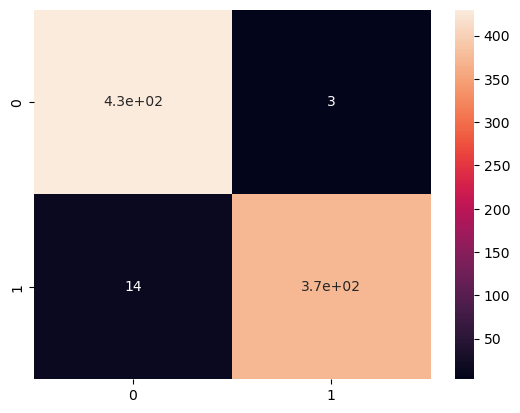

In [27]:
sns.heatmap(cm, annot=True)

### Plotting Accuracy and Loss Curves

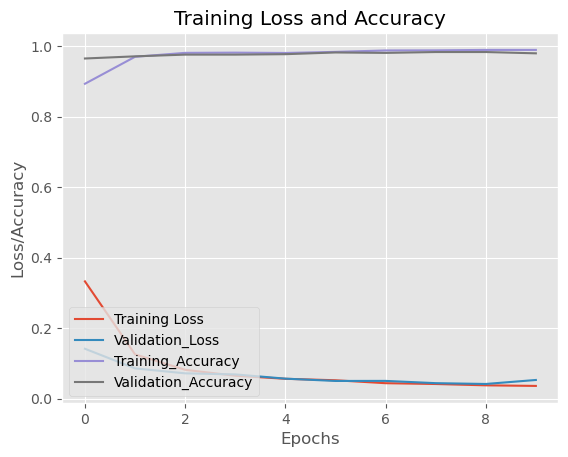

In [29]:
# plot the training loss and accuracy
n = epoch
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n), History.history["loss"], label="Training Loss")
plt.plot(np.arange(0, n), History.history["val_loss"], label="Validation_Loss")
plt.plot(np.arange(0, n), History.history["accuracy"], label="Training_Accuracy")
plt.plot(np.arange(0, n), History.history["val_accuracy"], label="Validation_Accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

### Reference
    FaceMaskDetection - Chandrikadeb7 - Github 